# Regularization
- "선형회귀 계수(Weight)에 대한 제약 조건을 추가함으로써 모형이 과도하게 최적화되는 현상, 즉 과최적화를 막는 방법"  
- "과최적화는 계수 크기를 과도하게 증가하는 경향이 있기에, 정규화 방법에서의 제약 조건은 일반적으로 계수의 크기를 제한하는 방법"  
- With train set, hyperparameter(s) is(are) good to be small because of overfitting.
- With test set, it's good when hyperparameter(s) is(are) within some range.

## Standard Regression: 
$$
\hat{\beta} = arg\underset{\hat{\beta}}{min} \Biggl[ \sum_{j=1}^t \Bigl(y_j - \sum_{i=0}^k \beta_i x_{ij} \Bigr)^2 \Biggr]
$$

## Ridge Regression:  
$$
\hat{\beta} = arg\underset{\hat{\beta}}{min} \Biggl[\sum_{j=1}^t \Bigl(y_j - \sum_{i=0}^k \beta_i x_{ij}\Bigr)^2 + \lambda \sum_{i=0}^k \beta_i^2\Biggr]
$$
where $\lambda$ is hyperparameter.
- Good at eliminating multicollinearity.
- Have a effect of preventing overfitting.
- With large $\lambda$, $\beta_i$ get smaller.
- With small $\lambda$, $\beta_i$ get larger.
- 모든 변수들을 포함하려 하므로 변수의 수가 많은 경우 효과가 좋지 않으나 과적합(Overfitting)을 방지하는데 효과적.
- 다중공선성이 존재할 경우, 변수 간 상관관계에 따라 계수로 다중공선성이 분산되기에 효과가 높음.


## Lasso(Least Absolute Shrinkage and Selection Operator) Regression:  
$$
\hat{\beta} = arg\underset{\hat{\beta}}{min} \Biggl[\sum_{j=1}^t \Bigl(y_j - \sum_{i=0}^k \beta_i x_{ij}\Bigr)^2 + \lambda \sum_{i=0}^k \left|\beta_i \right|\Biggr]$$
where $\lambda$ is hyperparameter.
- Have a effect of feature selection.
- 알고리즘이 최소한의 변수를 포함하여 하기 때문의 나머지 변수들의 계수는 0이됨 (Feature Selection 기능)  
- 변수선택 기능이 있기에 일반적으로 많이 사용되는 이점이 있지만 특정변수에 대한 계수가 커지는 단점 존재.
- 다중공선성이 존재할 경우, 특정 변수만을 선택하는 방식이라 Ridge에 비해 다중공선성 문제에 효과가 낮음.
- 계수 $\beta_{i}$를 0으로 수렴하게 만드는 효과가 큼.

## Elastic Net:  
$$
\hat{\beta} = arg\underset{\hat{\beta}}{min} \Biggl[ \sum_{j=1}^t \Bigl( y_j - \sum_{i=0}^k \beta_i x_{ij} \Bigr)^2 + \lambda_1 \sum_{i=0}^k \beta_i^2 + \lambda_2 \sum_{i=0}^k |\beta_i| \Biggr]
$$
where $\lambda_{1}$, $\lambda_{2}$ are hyperparameters.

## 실습

In [29]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [30]:
diabetes = sklearn.datasets.load_diabetes()
x = diabetes.data
y = diabetes.target

pd.concat([pd.DataFrame(y, columns=['diabetes_value']), pd.DataFrame(x, columns=diabetes.feature_names)], axis=1).head()

,diabetes_value,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,141.0,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


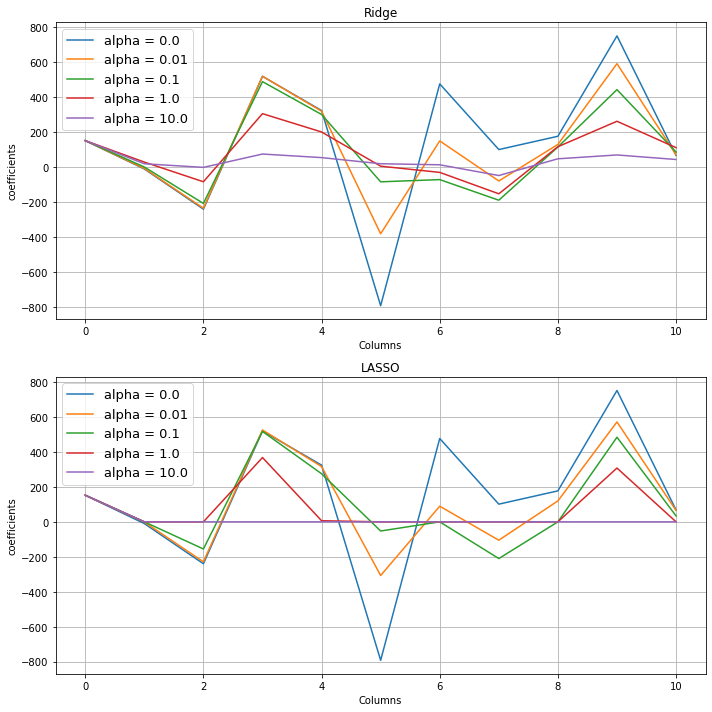

In [31]:
result_Ridge = pd.DataFrame()
alpha_candidate = np.hstack([0, np.logspace(-2, 1, 4)])
for alpha in alpha_candidate:
    fit = Ridge(alpha=alpha, fit_intercept=True, normalize=True, random_state=123).fit(x, y)
    result_coef = pd.DataFrame(np.hstack([fit.intercept_, fit.coef_]), columns=[f"alpha = {alpha}"])
    result_Ridge = pd.concat([result_Ridge, result_coef], axis=1)
    

result_LASSO = pd.DataFrame()
alpha_candidate = np.hstack([0, np.logspace(-2, 1, 4)])
for alpha in alpha_candidate:
    fit = Lasso(alpha=alpha, fit_intercept=True, normalize=True, random_state=123).fit(x, y)
    result_coef = pd.DataFrame(np.hstack([fit.intercept_, fit.coef_]), columns=[f"alpha = {alpha}"])
    result_LASSO = pd.concat([result_LASSO, result_coef], axis=1)
    
result_Ridge.plot(figsize=(10,10), legend=True, ax=plt.subplot(211))
plt.title('Ridge')
plt.xlabel('Columns')
plt.ylabel('coefficients')
plt.legend(fontsize=13)
plt.grid()
result_LASSO.plot(legend=True, ax=plt.subplot(212))
plt.title('LASSO')
plt.xlabel('Columns')
plt.ylabel('coefficients')
plt.legend(fontsize=13)
plt.tight_layout()
plt.grid()
plt.show()

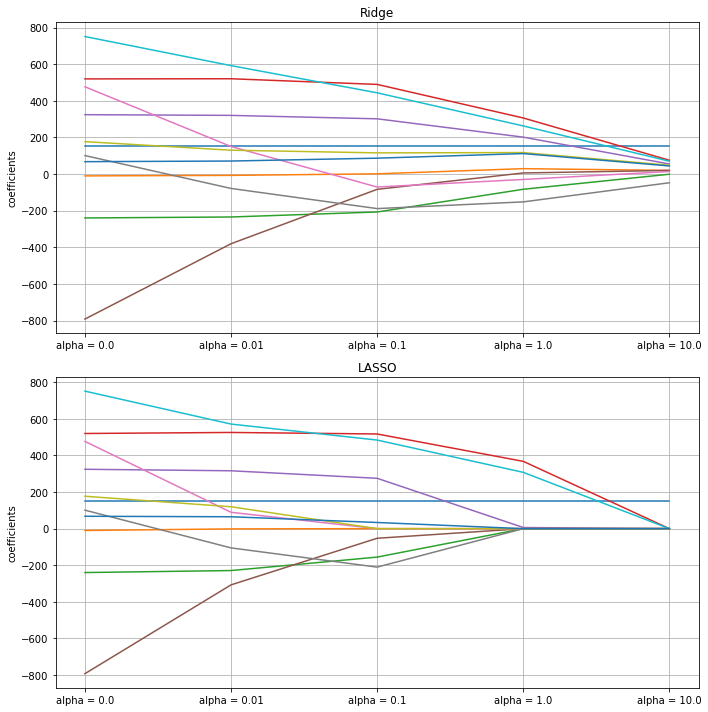

In [33]:
result_Ridge.T.plot(figsize=(10,10), legend=False, ax=plt.subplot(211))
plt.title('Ridge')
plt.xticks(np.arange(len(result_Ridge.columns)), [i for i in result_Ridge.columns])
plt.ylabel('coefficients')
plt.grid()
result_LASSO.T.plot(legend=False, ax=plt.subplot(212))
plt.title('LASSO')
plt.xticks(np.arange(len(result_Ridge.columns)), [i for i in result_Ridge.columns])
plt.ylabel('coefficients')
plt.tight_layout()
plt.grid()
plt.show()

# Bagging and Boosting

## Bagging vs Boosting
- Ensemble이란 머신러닝에서 여러개의 모델을 학습시켜, 그 모델들의 예측결과들을 이용해 하나의 모델보다 더 나은 값을 예측하는 방법
- Bagging(Bootstrap Aggregating):   
    - 부트스트래핑(Bootstraping): 예측값과 실제값의 차이 중복을 허용한 리샘플링(Resampling)  
    - 페이스팅(Pasting): 이와 반대로 중복을 허용하지 않는 샘플링  
- Boosting:   
    - 성능이 약한 학습기(weak learner)를 여러 개 연결하여 강한 학습기(strong learner)를 만드는 앙상블 학습  
    - 앞에서 학습된 모델을 보완해나가면서 더나은 모델로 학습시키는 것  

<center><img src='Image/Bagging_Boosting.png' width='700'></center> 

| - | Bagging | Boosting |
|-------------|---------------------------------------|-----------------------------------------|
| 특징 | 병렬 앙상블 모델(각 모델은 서로 독립) | 연속 앙상블 모델(이전 모델의 오류 반영) |
| 목적 | Variance 감소 | Bias 감소 |
| 적합한 상황 | Low Bias + High Variance | High Bias + Low Variance |
| Sampling | Random Sampling | Random Sampling with weight on error |

## Bagging
- Reduce variance.

### Decision Tree

### Random Forest
- 여러개의 의사결정나무(Decision Tree) 생성한 다음, 각 개별 트리의 예측값들 중 가장 많은 선택을 받은 변수들로 예측하는 알고리즘, 의사결정나무의 CLT버전
<center><img src='Image/Bagging_RF.jpg' width='700'></center> 

## Boosting 알고리즘
### Adaptive Boosting(AdaBoost)
- 학습된 모델이 과소적합(학습하기 어려운 데이터)된 학습 데이터 샘플의 가중치를 높이면서 더 잘 적합되도록 하는 방식
- 다수결을 통한 정답분류
- 오답에 가중치 부여
<center><img src='Image/Boosting_AdaBoost.png' width='600'></center> 

### Gradient Boosting Machine(GBM)
- 이전 단계 모델에서의 Residuals를 모델에 학습시키는 방법(Same principle as residual diagnostics)
<center><img src='Image/Boosting_GBM.png' width='600'></center> 

### XGBoost(eXtreme Gradient Boosting)
- 이전 단계 모델에서의 Residuals를 모델에 학습시키는 방법(Same principle as residual diagnostics)
- 높은 예측력으로 많은 양의 데이터를 다룰 때 사용되는 부스팅 알고리즘
- Level-wise tree growth
- Released in 2014.

### LightGBM
- 이전 단계 모델에서의 Residuals를 모델에 학습시키는 방법(Same principle as residual diagnostics)
- 현존하는 부스팅 알고리즘 중 가장 빠르고 높은 예측력 제공
- Leaf-wise tree growth
- XGBoost대비 성능향상 및 자원소모 최소화
- XGBoost가 처리하지 못하는 대용량 데이터 학습가능
- 근사치분할(Approximates the Split)을 통한 성능향상
- Released in 2016.